# DBLINK in VerticaPy

## Introduction

Starting with VerticaPy 0.12.0, you can work with other databases, such as PostgresQL and mySQL, using DBLINK functionality. DBLINK is a Vertica User Defined Transform Function coded in C++ that runs SQL against other databases. To setup and learn more about DBLINK in Vertica, please view the <a href=https://github.com/vertica/dblink>github repo</a>.

In order to use this new functionality, we first need to install the ODBC driver and manager, as well as configure DBLINK on all nodes of the cluster. Configuration entails three files:

<ul class="ul_content">
    <li>dblink.cids</li>
    <li>odbc.ini</li>
    <li>odbcinst.ini</li>
</ul>
    
For more information about requirements, see the <a href=https://github.com/vertica/dblink>github repo</a>.

These files provide the host server address, username, and password, as well as the database name that we want to access. In future versions, we are planning to simplify this process and automate the creation of these files. 

In the next section, let's work through an example of a database in PostgreSQL.

## Connecting to an External Database

In [1]:
# Importing VerticaPy
import verticapy as vp

We first need to provide the connection information that we have set up in the <b>Connection Identifier Database</b> file (dblink.cids). We can select a <b>special character</b> symbol to identify this connection. 

Let's try to set up a connection with an external PostgreSQL database, which we name "pgdb". The connection details for "pgdb", including server name, user name etc., are in the configuration files mentioned in the introduction section.

In [2]:
# Setting up a connection with a database with the alias "pgdb"
vp.set_external_connection(cid = "pgdb",
                           rowset = 500,
                           symbol = "&")

## Creating a vDataFrame

We can create a vDataFrame from a table stored in an external database by setting the '<b>external</b>' parameter to True. SQL can be used to fetch required data, and we can provide an identifying symbol that can be used for fetching perform queries with SQL. 

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
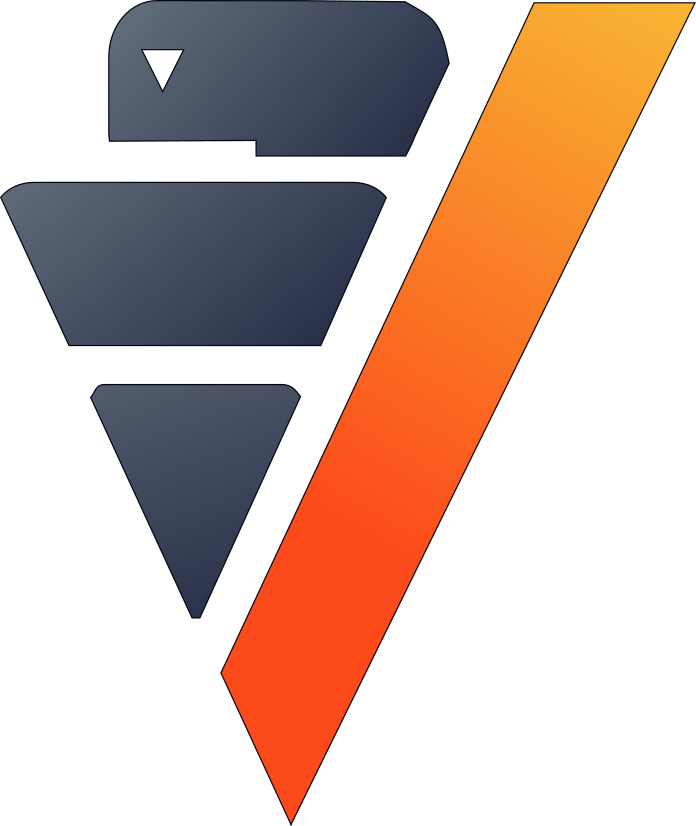

In [3]:
# Creating a vDataFrame using an SQL query by setting external = True.
tab_data = vp.vDataFrame(input_relation = "airports",
                         external = True,
                         symbol = "&")
tab_data

All vDataFrame functions are available for this imported table. For example, we can get all the column names:

In [ ]:
# Get all columns of the dataset
tab_data.get_columns()

Or the column data types:

In [ ]:
# Get data types of all columns inside the dataset
tab_data.dtypes()

Or the count of the datapoints:

count  
"IATA_CODE"      322.0  
"AIRPORT"        322.0  
"CITY"           322.0  
"STATE"          322.0  
"COUNTRY"        322.0  
"LATITUDE"       319.0  
"LONGITUDE"      319.0  
Rows: 1-7 | Columns: 2
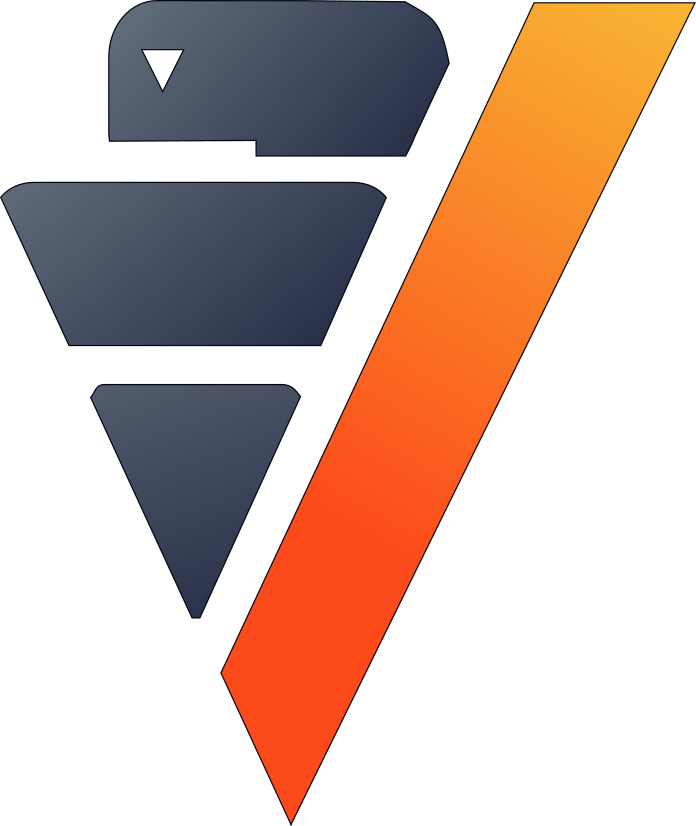

In [6]:
# Counting all elements inside each column
tab_data.count()

<b>Note:</b> Every time we perform these calculations or call the vDataFrame, it runs the SQL query to fetch all the data from the external database. After retrieving the entire table, the operations are computed by Vertica. In order to push the queries to a remote database, we can use the option "<b>sql_push_ext</b>". When we create a vDataFrame with this option activated, all the aggregations are done on the external database using SQL.

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
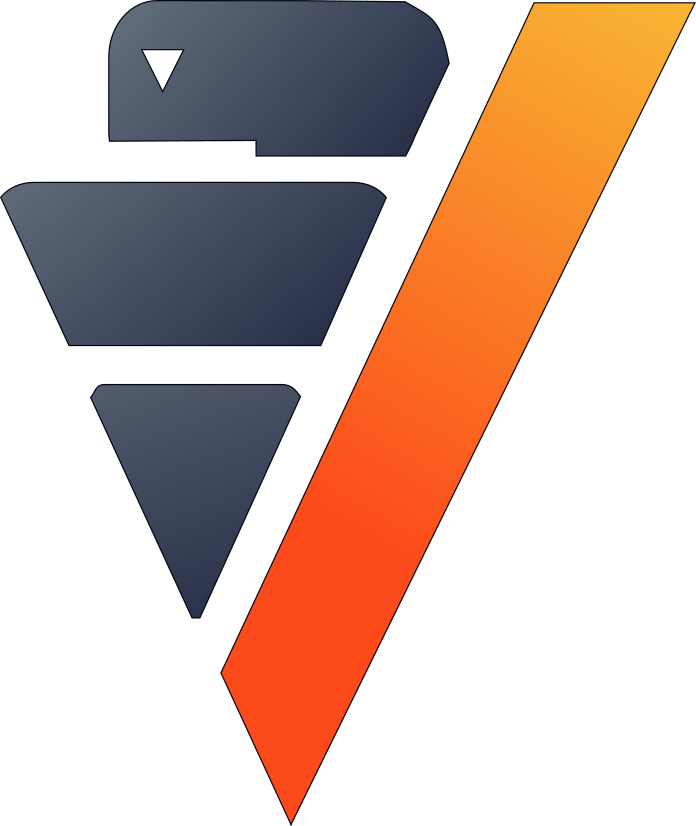

In [7]:
# Creating a vDataFrame and setting sql_push_ext to True, which tries 
# to push SQL queries to external database (where possible).
Ext_Table=vp.vDataFrame(input_relation = "airports",
                        external = True,
                        symbol = "&",
                        sql_push_ext = True)
Ext_Table

If we look at the SQL generated in background, we can see that it pushes the aggregation query to the database.

In [8]:
# Turning on SQL output to view the queries
vp.set_option("sql_on",True)

Let's look at the count query again, and see how VerticaPy is pushing it to the <b>external</b> database.

count  
"IATA_CODE"      322.0  
"AIRPORT"        322.0  
"CITY"           322.0  
"STATE"          322.0  
"COUNTRY"        322.0  
"LATITUDE"       319.0  
"LONGITUDE"      319.0  
Rows: 1-7 | Columns: 2
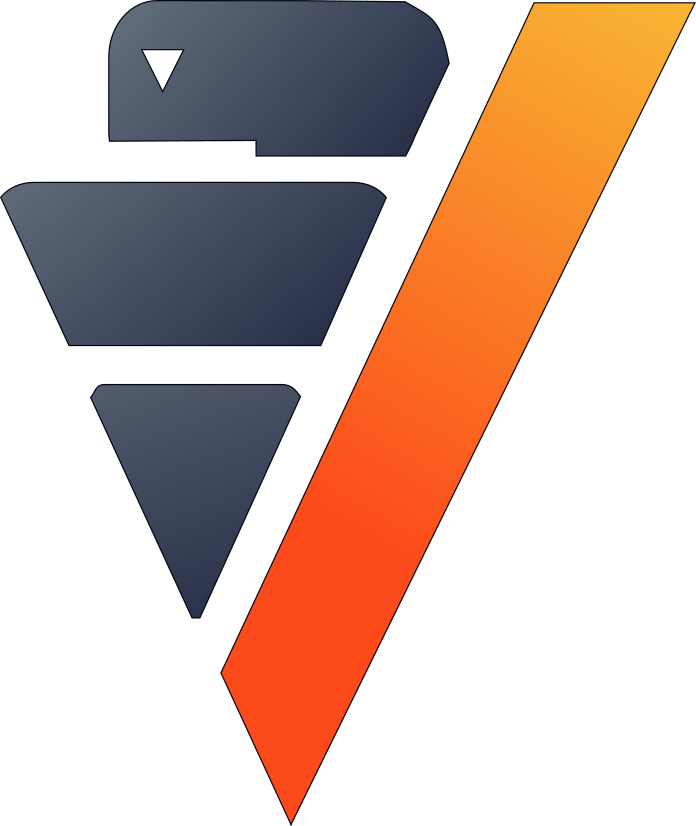

In [9]:
# Counting elements in each column
Ext_Table.count()

Let's also look at the "<b>min</b>" method:

In [10]:
# Finding minimum in the ID column of Ext_Table
Ext_Table["LATITUDE"].min()

13.48345

For the above examples, the queries were pushed to the <b>external</b> database.
<p>
If the function is unique to Vertica, it automatically fetches the data from the external database to compute on the <u>Vertica server</u>. 
    
Let's try an example with the <a href="https://www.vertica.com/python/old/documentation_last/vdataframe/main-methods/describe/"> describe</a> function, which is a unique Vertica function.
</p>

count                 mean                 std           min   \\
"LATITUDE"         319     38.9812439184953    8.61673558101804      13.48345   \\
"LONGITUDE"        319    -98.3789644514107    21.5234920464981    -176.64603   \\
                  approx_25%    approx_50%    approx_75%          max  
"LATITUDE"          33.65204      39.29761     43.154675     71.28545  
"LONGITUDE"      -110.839385     -93.40307    -82.722995    -64.79856  
Rows: 1-2 | Columns: 9
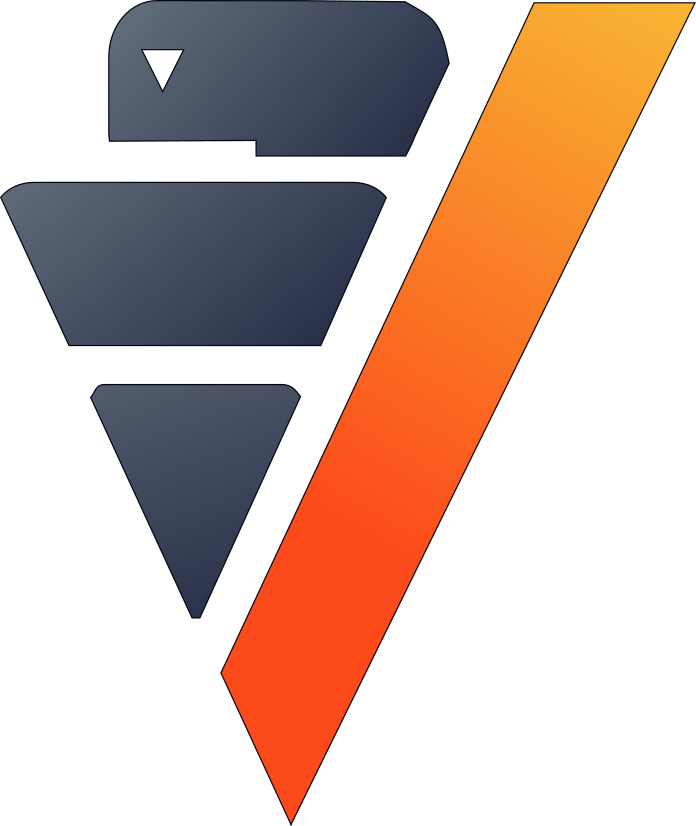

In [11]:
# Describe the main attributes of numerical columns in the Ext_table
Ext_Table.describe()

We can see that the data was <b>fetched from the external database</b> to be <b>computed in Vertica</b>.

(Now we can turn off SQL display).

In [12]:
# Turning off SQL display
vp.set_option("sql_on",
              False)

## Using SQL Magic Cells

In [2]:
# Load extension for running SQL magic cells
%load_ext verticapy.sql

We can use magic cells to call external tables using special characters like "$$$" and "%%%". If we have multiple external databases, we can specify special characters for each.

This makes writing queries a lot <b>more convenient</b> and <b>visually appealing</b>!

Now we will try to get fetch data from our external database "pgdb, whose special character is "&".

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
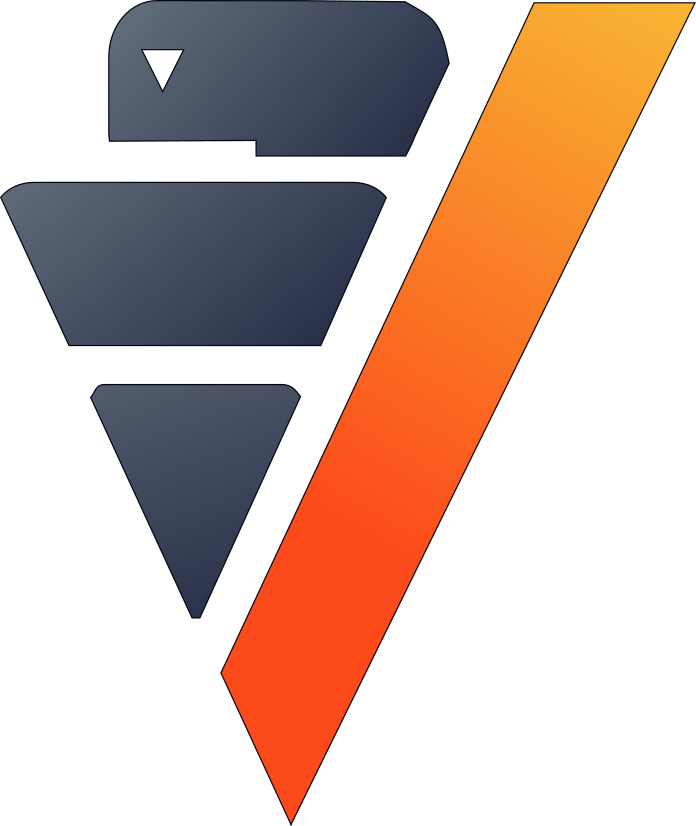

In [14]:
%%sql
/* Getting all data from airports table which is placed in the PostgreSQL database represented by "&". */
SELECT * FROM &&& airports &&&;

To perform all regular queries, all we need to do is call the table with its name inside three special characters.

We'll now try out some queries:

Count the elements inside the table:

COUNT  
1      322  
Column: COUNT | Type: Integer
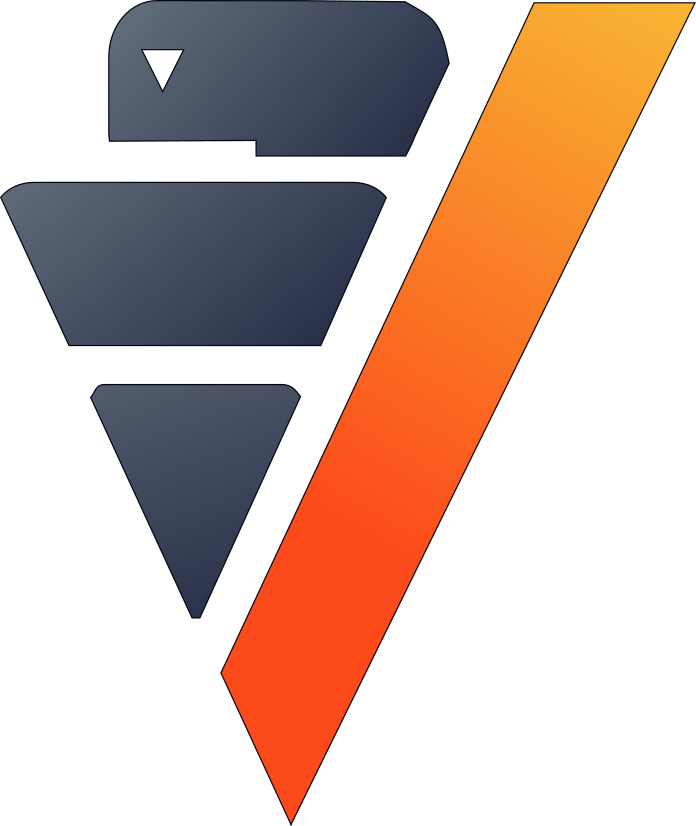

In [15]:
%%sql
/* Counting all elements inside the airports table in PostgreSQL. */
SELECT COUNT(*) FROM &&& airports &&&;

Find the IATA_CODE where CITY is "Allentown":

IATA_CODE  
1          ABE  
Column: IATA_CODE | Type: Varchar(3)
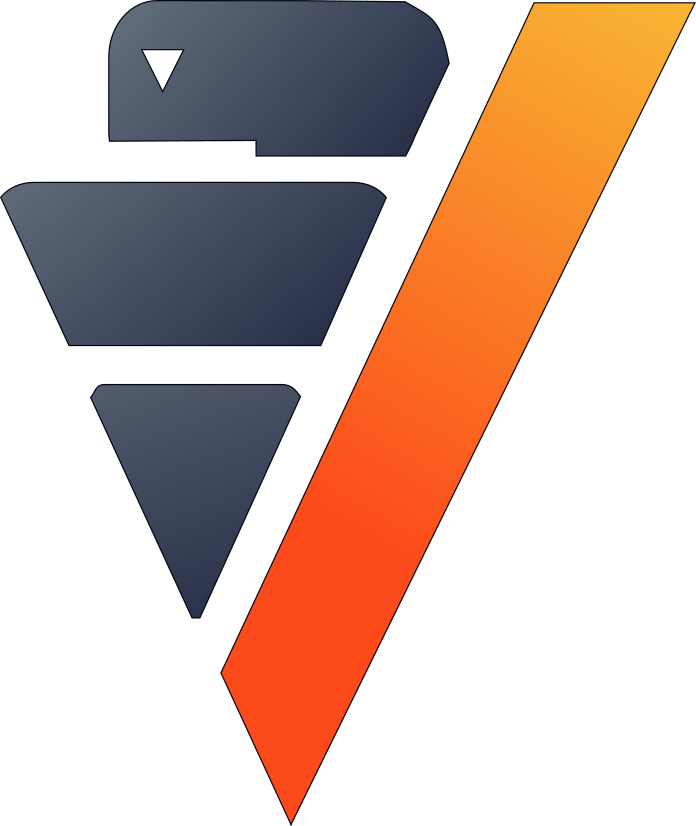

In [16]:
%%sql
/* Finding IATA_CODE where the CITY is "Allentown" in the airports table. */
SELECT IATA_CODE
FROM &&& airports &&&
WHERE CITY='Allentown';

<b>Note:</b> Any query that we write inside the "&&&" signs is also sent to the external database to be run.

So, instead of just calling the whole table, we can query it using the same special character padding.

For example, let's select all elements inside the <b>airports</b> table:

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
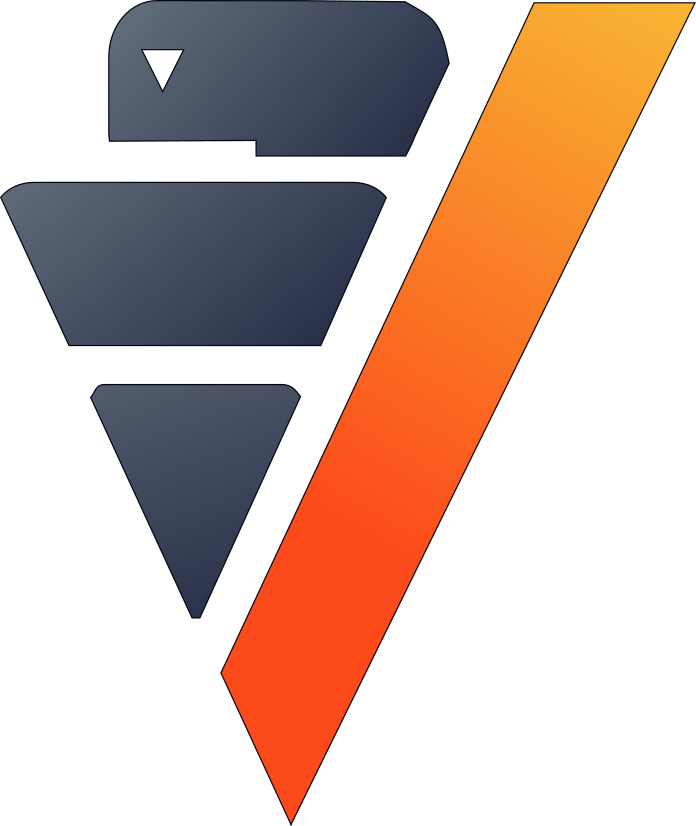

In [17]:
%%sql
/* Getting all data from airports table which is placed in the PostgreSQL database represented by "$". */
&&& SELECT * FROM airports &&&;

Now we'll run a search query to find a particular id:

IATA_CODE  
1          ABE  
Column: IATA_CODE | Type: Varchar(3)
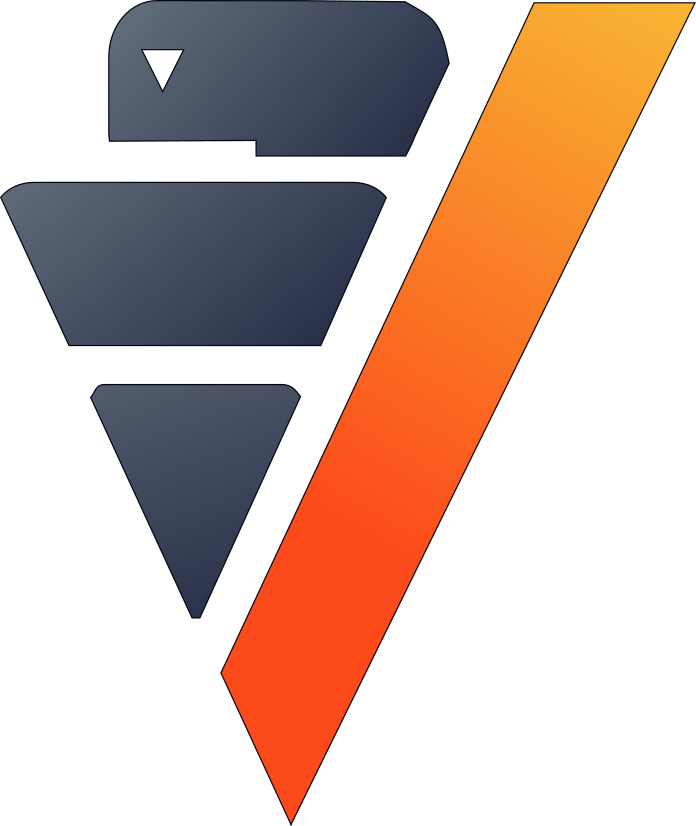

In [18]:
%%sql
/* Finding IATA_CODE where the CITY is "Allentown" in the airports table. */
&&& SELECT "IATA_CODE" FROM airports WHERE "CITY"='Allentown' &&&;

We can also insert a new entry into the airports table, which is placed in the postgreSQL database represented by "&":

In [19]:
%%sql
/* Inserting an entry into the airportss table which is placed in the postgreSQL database represented by "&". */
&&& 
INSERT INTO airports 
       ("IATA_CODE", "AIRPORT",        "CITY",    "STATE", "COUNTRY", "LATITUDE", "LONGITUDE") 
VALUES ('MXX'      , 'Midway Airport', 'Chicago', 'IL',    'USA',     66.60,      35.00); 
&&&

undefined


## Connect Multiple Databases

You can connect and use multiple datasets from different databases. 

In this example we will get:
<ul class="ul_content">
    <li>Airline data from <b>PostgreSQL</b></li>
    <li>Airport data from <b>MySQL</b></li>
    <li>Flights data from <b>Vertica</b></li>
</ul>

The datasets can be found <a href=https://www.kaggle.com/datasets/usdot/flight-delays>here</a>.

### Airline Data in PostgreSQL

We can set up a new connection in just one line by referencing the alias inside the connection files. As before, we will provide the special character symbol that is used to invoke the connection. 

In [3]:
# Setting up a connection with a database given an alias "pgdb"
vp.set_external_connection(cid="pgdb",
                           rowset=500,
                           symbol="$")

Let's look at the <b>airline</b> table that we have in our postgreSQL database.

IATA_CODE                         AIRLINE  
1            UA           United Air Lines Inc.  
2            AA          American Airlines Inc.  
3            US                 US Airways Inc.  
4            F9          Frontier Airlines Inc.  
5            B6                 JetBlue Airways  
6            OO           Skywest Airlines Inc.  
7            AS            Alaska Airlines Inc.  
8            NK                Spirit Air Lines  
9            WN          Southwest Airlines Co.  
10           DL            Delta Air Lines Inc.  
11           EV     Atlantic Southeast Airlines  
12           HA          Hawaiian Airlines Inc.  
13           MQ    American Eagle Airlines Inc.  
14           VX                  Virgin America  
15           UA           United Air Lines Inc.  
16           AA          American Airlines Inc.  
17           US                 US Airways Inc.  
18           F9          Frontier Airlines Inc.  
19           B6                 JetBlue Airways  
20           OO           Skywest Airlines Inc.  
21           AS            Alaska Airlines Inc.  
22           NK                Spirit Air Lines  
23           WN          Southwest Airlines Co.  
24           DL            Delta Air Lines Inc.  
25           EV     Atlantic Southeast Airlines  
26           HA          Hawaiian Airlines Inc.  
27           MQ    American Eagle Airlines Inc.  
28           VX                  Virgin America  
Columns: 2
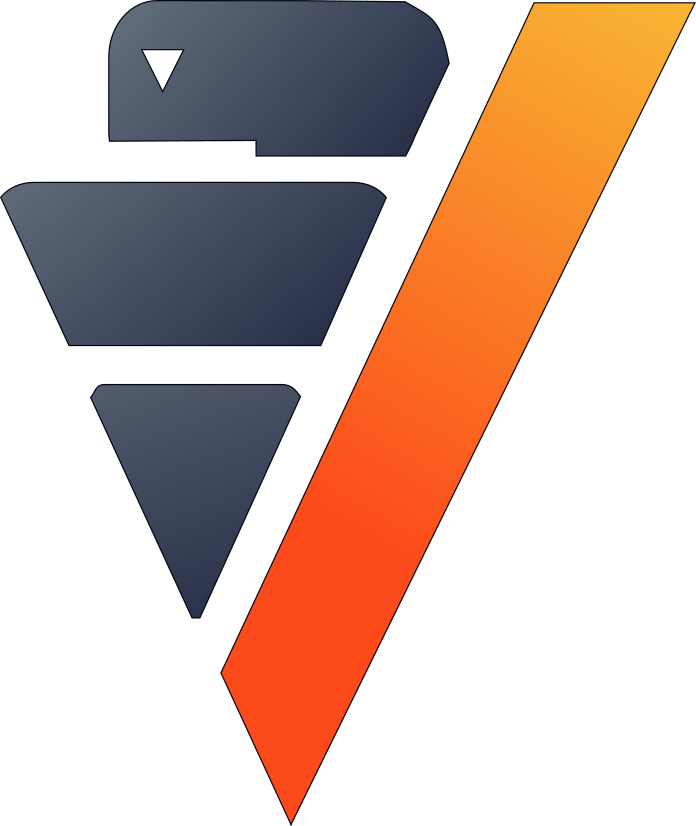

In [4]:
%%sql
/* Fetch all the data from the table airports in "pgdb" database. */
SELECT * FROM $$$ airline $$$;

### Airports Data in MySQL

We can create another new connection by providing the cid reference for our MySQL database. We'll also provide a unique special character, which is not used for any other connection. 

In [5]:
# Setting up a connection with a database given an alias "mysql"
vp.set_external_connection(cid="mysql",
                           rowset=500,
                           symbol="&")

Let's take a look at the <b>airports</b> table that we have in our MySQL database.

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
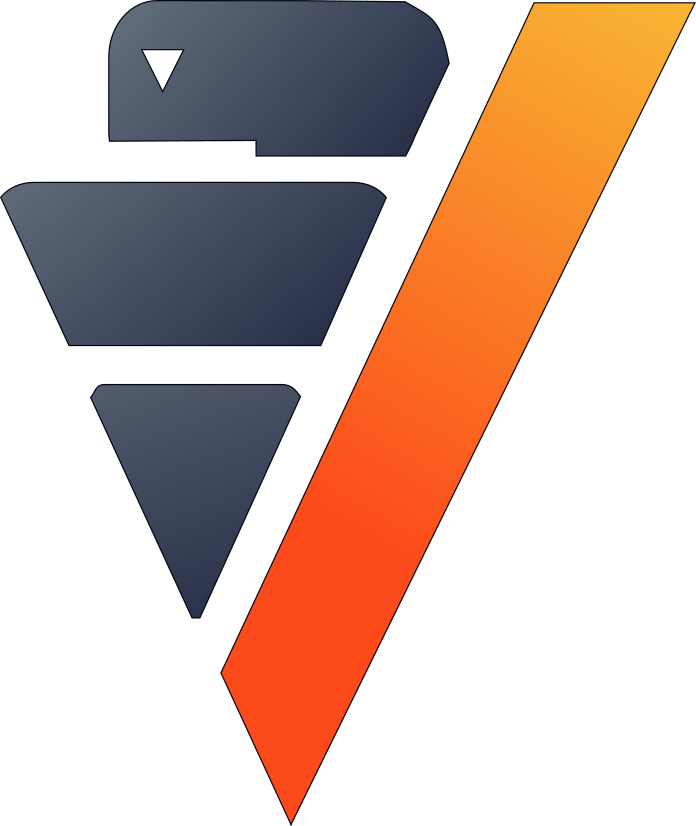

In [6]:
%%sql
/* Fetch all the data from the table airports in "mysql" database */
SELECT * FROM &&& airports &&&;

### Flights Data Vertica

We'll now read a locally stored CSV file with the flights data and materialize it in Vertica. 

YEAR    MONTH    DAY    DAY_OF_WEEK    AIRLINE   \\
1      2015        1      1              4         AA   \\
2      2015        1      1              4         AA   \\
3      2015        1      1              4         AA   \\
4      2015        1      1              4         AA   \\
5      2015        1      1              4         AA   \\
6      2015        1      1              4         AA   \\
7      2015        1      1              4         AA   \\
8      2015        1      1              4         AA   \\
9      2015        1      1              4         AA   \\
10     2015        1      1              4         AA   \\
11     2015        1      1              4         AA   \\
12     2015        1      1              4         AA   \\
13     2015        1      1              4         AA   \\
14     2015        1      1              4         AA   \\
15     2015        1      1              4         AA   \\
16     2015        1      1              4         AA   \\
17     2015        1      1              4         AA   \\
18     2015        1      1              4         AA   \\
19     2015        1      1              4         AA   \\
20     2015        1      1              4         AA   \\
21     2015        1      1              4         AA   \\
22     2015        1      1              4         AA   \\
23     2015        1      1              4         AA   \\
24     2015        1      1              4         AA   \\
25     2015        1      1              4         AA   \\
26     2015        1      1              4         AA   \\
27     2015        1      1              4         AA   \\
28     2015        1      1              4         AA   \\
29     2015        1      1              4         AA   \\
30     2015        1      1              4         AA   \\
31     2015        1      1              4         AA   \\
32     2015        1      1              4         AA   \\
33     2015        1      1              4         AA   \\
34     2015        1      1              4         AA   \\
35     2015        1      1              4         AA   \\
36     2015        1      1              4         AA   \\
37     2015        1      1              4         AA   \\
38     2015        1      1              4         AA   \\
39     2015        1      1              4         AA   \\
40     2015        1      1              4         AA   \\
41     2015        1      1              4         AA   \\
42     2015        1      1              4         AA   \\
43     2015        1      1              4         AA   \\
44     2015        1      1              4         AA   \\
45     2015        1      1              4         AA   \\
46     2015        1      1              4         AA   \\
47     2015        1      1              4         AA   \\
48     2015        1      1              4         AA   \\
49     2015        1      1              4         AA   \\
50     2015        1      1              4         AA   \\
51     2015        1      1              4         AA   \\
52     2015        1      1              4         AA   \\
53     2015        1      1              4         AA   \\
54     2015        1      1              4         AA   \\
55     2015        1      1              4         AA   \\
56     2015        1      1              4         AA   \\
57     2015        1      1              4         AA   \\
58     2015        1      1              4         AA   \\
59     2015        1      1              4         AA   \\
60     2015        1      1              4         AA   \\
61     2015        1      1              4         AA   \\
62     2015        1      1              4         AA   \\
63     2015        1      1              4         AA   \\
64     2015        1      1              4         AA   \\
65     2015        1      1              4         AA   \\
66     2015        1      1              4         AA   \\
67     2015        1      1              4         AA 
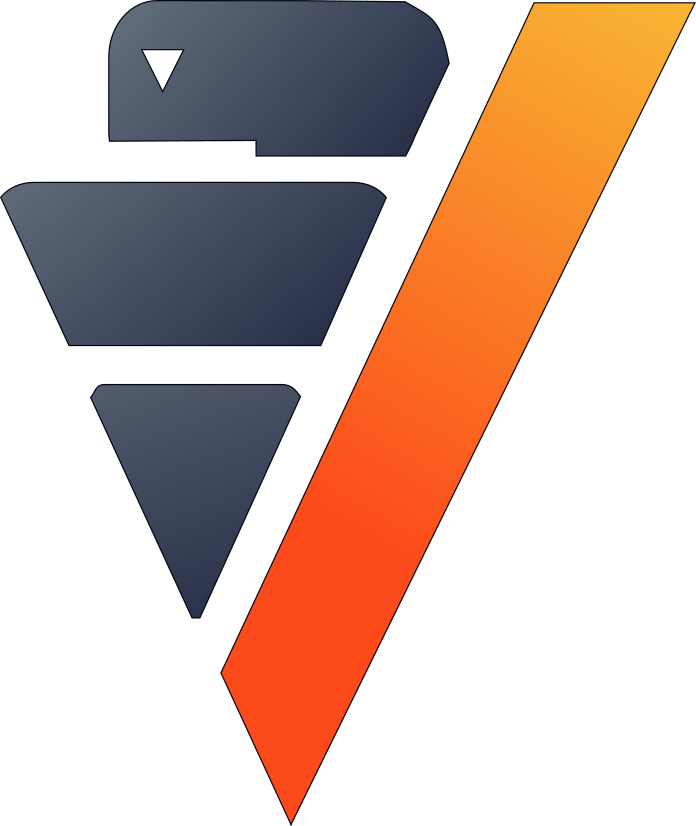

In [7]:
# Reading a csv file and naming the table flights_vertica
flight_vertica = vp.read_csv('flights.csv',
                             table_name = "flight_vertica")
flight_vertica

YEAR    MONTH    DAY    DAY_OF_WEEK    AIRLINE   \\
1      2015        1      1              4         AA   \\
2      2015        1      1              4         AA   \\
3      2015        1      1              4         AA   \\
4      2015        1      1              4         AA   \\
5      2015        1      1              4         AA   \\
6      2015        1      1              4         AA   \\
7      2015        1      1              4         AA   \\
8      2015        1      1              4         AA   \\
9      2015        1      1              4         AA   \\
10     2015        1      1              4         AA   \\
11     2015        1      1              4         AA   \\
12     2015        1      1              4         AA   \\
13     2015        1      1              4         AA   \\
14     2015        1      1              4         AA   \\
15     2015        1      1              4         AA   \\
16     2015        1      1              4         AA   \\
17     2015        1      1              4         AA   \\
18     2015        1      1              4         AA   \\
19     2015        1      1              4         AA   \\
20     2015        1      1              4         AA   \\
21     2015        1      1              4         AA   \\
22     2015        1      1              4         AA   \\
23     2015        1      1              4         AA   \\
24     2015        1      1              4         AA   \\
25     2015        1      1              4         AA   \\
26     2015        1      1              4         AA   \\
27     2015        1      1              4         AA   \\
28     2015        1      1              4         AA   \\
29     2015        1      1              4         AA   \\
30     2015        1      1              4         AA   \\
31     2015        1      1              4         AA   \\
32     2015        1      1              4         AA   \\
33     2015        1      1              4         AA   \\
34     2015        1      1              4         AA   \\
35     2015        1      1              4         AA   \\
36     2015        1      1              4         AA   \\
37     2015        1      1              4         AA   \\
38     2015        1      1              4         AA   \\
39     2015        1      1              4         AA   \\
40     2015        1      1              4         AA   \\
41     2015        1      1              4         AA   \\
42     2015        1      1              4         AA   \\
43     2015        1      1              4         AA   \\
44     2015        1      1              4         AA   \\
45     2015        1      1              4         AA   \\
46     2015        1      1              4         AA   \\
47     2015        1      1              4         AA   \\
48     2015        1      1              4         AA   \\
49     2015        1      1              4         AA   \\
50     2015        1      1              4         AA   \\
51     2015        1      1              4         AA   \\
52     2015        1      1              4         AA   \\
53     2015        1      1              4         AA   \\
54     2015        1      1              4         AA   \\
55     2015        1      1              4         AA   \\
56     2015        1      1              4         AA   \\
57     2015        1      1              4         AA   \\
58     2015        1      1              4         AA   \\
59     2015        1      1              4         AA   \\
60     2015        1      1              4         AA   \\
61     2015        1      1              4         AA   \\
62     2015        1      1              4         AA   \\
63     2015        1      1              4         AA   \\
64     2015        1      1              4         AA   \\
65     2015        1      1              4         AA   \\
66     2015        1      1              4         AA   \\
67     2015        1      1              4         AA 
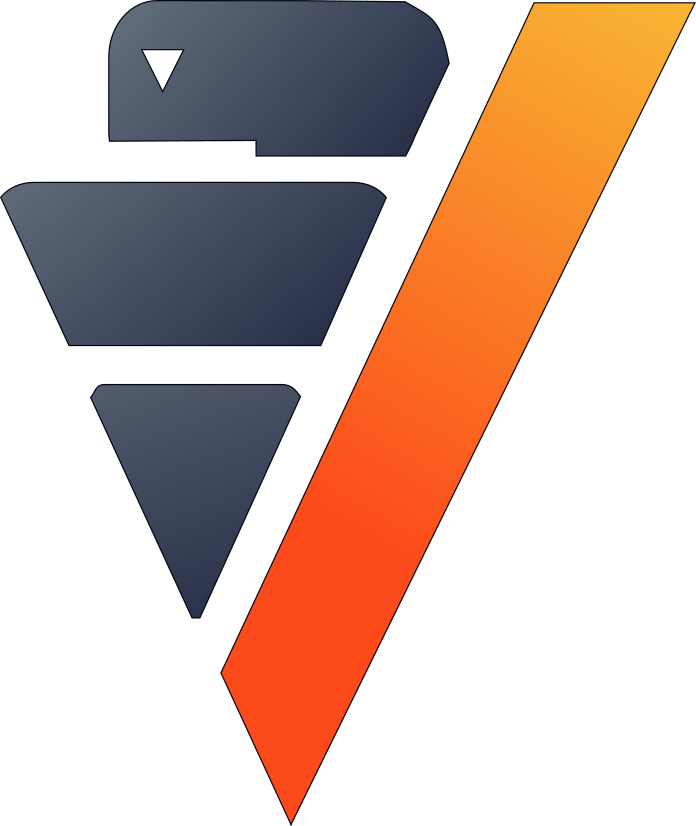

In [8]:
%%sql
/* Fetch all the data from the table flight_vertica. */
SELECT * FROM flight_vertica;

### Joins and Queries Across Multiple Databases

Now we can run queries that execute through multiple sources.

Let's try to find the TAIL_NUMBER and Departing City for all the flights by joining the two tables:
<ul class="ul_content">
    <li><b>flight_vertica</b> (stored in <b>Vertica</b>)</li>
    <li><b>airports</b> (stored in <b>MySQL</b>)</li>
</ul>

TAIL_NUMBER       Departing_City  
1           N787AA             New York  
2           N795AA          Los Angeles  
3           N798AA             New York  
4           N799AA          Los Angeles  
5           N376AA    Dallas-Fort Worth  
6           N398AA              Kahului  
7           N398AA    Dallas-Fort Worth  
8           N368AA             Honolulu  
9           N792AA             New York  
10          N796AA          Los Angeles  
11          N792AA          Los Angeles  
12          N5ERAA              Kahului  
13          N783AA             New York  
14          N783AA        San Francisco  
15          N019AA              Atlanta  
16          N786AA             New York  
17          N789AA        San Francisco  
18          N795AA             New York  
19          N786AA          Los Angeles  
20          N371AA    Dallas-Fort Worth  
21          N371AA        San Francisco  
22          N784AA        San Francisco  
23          N3AVAA               Boston  
24          N5DUAA    Dallas-Fort Worth  
25          N358AA          Los Angeles  
26          N455AA              Ontario  
27          N568AA    Dallas-Fort Worth  
28          N795AA          Los Angeles  
29          N5ESAA          Los Angeles  
30          N794AA          Los Angeles  
31          N3ALAA    Dallas-Fort Worth  
32          N3ALAA               Hayden  
33          N3EKAA            San Diego  
34          N483AA    Dallas-Fort Worth  
35          N3BYAA            Arlington  
36          N3KEAA              Chicago  
37          N3GPAA              Seattle  
38          N3BNAA    Dallas-Fort Worth  
39          N3KCAA              Detroit  
40          N3AJAA            Las Vegas  
41          N3ELAA             New York  
42          N3CSAA             San Jose  
43          N3KSAA              Chicago  
44          N3JXAA            San Diego  
45          N5ELAA    Dallas-Fort Worth  
46          N570AA       Salt Lake City  
47          N471AA    Dallas-Fort Worth  
48          N3LMAA          Los Angeles  
49          N3LHAA            Arlington  
50          N3CWAA            Las Vegas  
51          N3JJAA              Chicago  
52          N5DFAA          Kailua/Kona  
53          N5DFAA          Los Angeles  
54          N372AA    Dallas-Fort Worth  
55          N850AA                Miami  
56          N3ECAA                Miami  
57          N3HXAA    Dallas-Fort Worth  
58          N3HLAA             New York  
59          N631AA             San Juan  
60          N631AA             New York  
61          N5EGAA        San Francisco  
62          N3HTAA                Miami  
63          N5BTAA            San Diego  
64          N3GHAA    Dallas-Fort Worth  
65          N5EKAA    Dallas-Fort Worth  
66          N5EKAA              Orlando  
67          N3FBAA         Philadelphia  
68          N488AA            Cleveland  
69          N505AA    Dallas-Fort Worth  
70          N3HPAA            Chantilly  
71          N3HPAA          Los Angeles  
72          N3HPAA        San Francisco  
73          N520AA    Dallas-Fort Worth  
74          N4XTAA               Tucson  
75          N4XCAA    Dallas-Fort Worth  
76          N4XBAA              Orlando  
77          N3AXAA               Boston  
78          N3AXAA             New York  
79          N785AA             New York  
80          N3GTAA             Portland  
81          N490AA              Chicago  
82          N3KVAA              Houston  
83          N3KHAA            San Diego  
84          N3HHAA              Chicago  
85          N3ANAA            San Diego  
86          N3ANAA             New York  
87          N553AA    Dallas-Fort Worth  
88          N553AA             St Louis  
89          N3ENAA            Arlington  
90          N3KMAA              Chicago  
91          N376AA             Honolulu  
92          N4XSAA    Dallas-Fort Worth  
93          N4XSAA          New Orleans  
94          N3LRAA            Santa Ana  
95          N3LYA
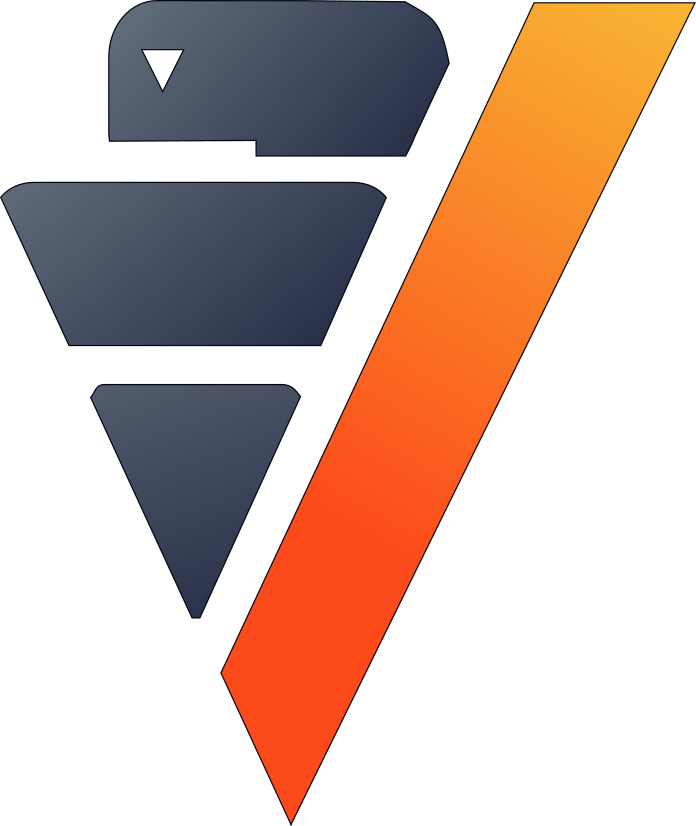

In [9]:
%%sql
/* Fetch TAIL_NUMBER and CITY after Joining the flight_vertica table with airports table in MySQL database. */
SELECT flight_vertica.TAIL_NUMBER, airports.CITY AS Departing_City
FROM flight_vertica
INNER JOIN &&& airports &&&
ON flight_vertica.ORIGIN_AIRPORT = airports.IATA_CODE;

Let's try another query to find the TAIL_NUMBER and AIRLINE of all the flights by joining the two tables: 
<ul class="ul_content">
    <li><b>flight_vertica</b> (stored in <b>Vertica</b>)</li>
    <li><b>airline</b> (stored in <b>PostgreSQL</b>)</li>
</ul>

TAIL_NUMBER                   AIRLINE  
1           N787AA    American Airlines Inc.  
2           N787AA    American Airlines Inc.  
3           N795AA    American Airlines Inc.  
4           N795AA    American Airlines Inc.  
5           N798AA    American Airlines Inc.  
6           N798AA    American Airlines Inc.  
7           N799AA    American Airlines Inc.  
8           N799AA    American Airlines Inc.  
9           N376AA    American Airlines Inc.  
10          N376AA    American Airlines Inc.  
11          N398AA    American Airlines Inc.  
12          N398AA    American Airlines Inc.  
13          N398AA    American Airlines Inc.  
14          N398AA    American Airlines Inc.  
15          N368AA    American Airlines Inc.  
16          N368AA    American Airlines Inc.  
17          N792AA    American Airlines Inc.  
18          N792AA    American Airlines Inc.  
19          N796AA    American Airlines Inc.  
20          N796AA    American Airlines Inc.  
21          N792AA    American Airlines Inc.  
22          N792AA    American Airlines Inc.  
23          N5ERAA    American Airlines Inc.  
24          N5ERAA    American Airlines Inc.  
25          N783AA    American Airlines Inc.  
26          N783AA    American Airlines Inc.  
27          N783AA    American Airlines Inc.  
28          N783AA    American Airlines Inc.  
29          N019AA    American Airlines Inc.  
30          N019AA    American Airlines Inc.  
31          N786AA    American Airlines Inc.  
32          N786AA    American Airlines Inc.  
33          N789AA    American Airlines Inc.  
34          N789AA    American Airlines Inc.  
35          N795AA    American Airlines Inc.  
36          N795AA    American Airlines Inc.  
37          N786AA    American Airlines Inc.  
38          N786AA    American Airlines Inc.  
39          N371AA    American Airlines Inc.  
40          N371AA    American Airlines Inc.  
41          N371AA    American Airlines Inc.  
42          N371AA    American Airlines Inc.  
43          N784AA    American Airlines Inc.  
44          N784AA    American Airlines Inc.  
45          N3AVAA    American Airlines Inc.  
46          N3AVAA    American Airlines Inc.  
47          N5DUAA    American Airlines Inc.  
48          N5DUAA    American Airlines Inc.  
49          N358AA    American Airlines Inc.  
50          N358AA    American Airlines Inc.  
51          N455AA    American Airlines Inc.  
52          N455AA    American Airlines Inc.  
53          N568AA    American Airlines Inc.  
54          N568AA    American Airlines Inc.  
55          N795AA    American Airlines Inc.  
56          N795AA    American Airlines Inc.  
57          N5ESAA    American Airlines Inc.  
58          N5ESAA    American Airlines Inc.  
59          N794AA    American Airlines Inc.  
60          N794AA    American Airlines Inc.  
61          N3ALAA    American Airlines Inc.  
62          N3ALAA    American Airlines Inc.  
63          N3ALAA    American Airlines Inc.  
64          N3ALAA    American Airlines Inc.  
65          N3EKAA    American Airlines Inc.  
66          N3EKAA    American Airlines Inc.  
67          N483AA    American Airlines Inc.  
68          N483AA    American Airlines Inc.  
69          N3BYAA    American Airlines Inc.  
70          N3BYAA    American Airlines Inc.  
71          N3KEAA    American Airlines Inc.  
72          N3KEAA    American Airlines Inc.  
73          N3GPAA    American Airlines Inc.  
74          N3GPAA    American Airlines Inc.  
75          N3BNAA    American Airlines Inc.  
76          N3BNAA    American Airlines Inc.  
77          N3KCAA    American Airlines Inc.  
78          N3KCAA    American Airlines Inc.  
79          N3AJAA    American Airlines Inc.  
80          N3AJAA    American Airlines Inc.  
81          N3ELAA    American Airlines Inc.  
82          N3ELAA    American Airlines Inc.  
83          N3CSAA    American Airlines Inc.  
84          N3CSAA    American Airlines Inc.  
85          
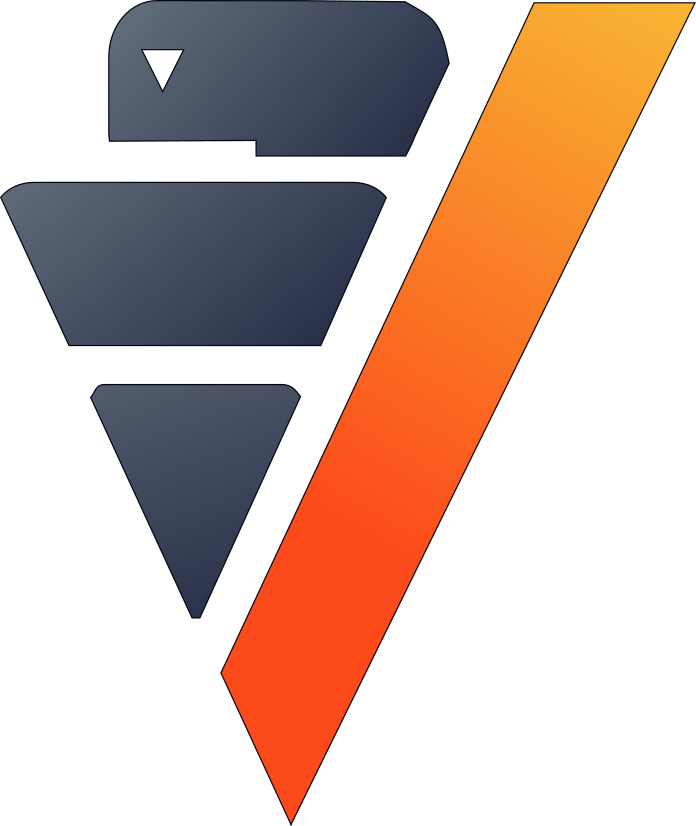

In [30]:
%%sql
/* Fetch TAIL_NUMBER and AIRLINE after Joining the flight_vertica table with airline table in PostgreSQL database. */
SELECT flight_vertica.TAIL_NUMBER, airline.AIRLINE
FROM flight_vertica
INNER JOIN $$$ airline $$$ 
ON flight_vertica.AIRLINE = airline.IATA_CODE;

We can even try queries that require multiple joins.

In the following example, we try to get the TAIL_NUMBER, AIRLINE, and CITY details for all the flights by joining:
<ul class="ul_content">
<li><b>flight_local</b> table (stored in <b>Vertica</b>)</li>
<li><b>airline</b> table (stored in <b>PostgreSQL</b>)</li>
<li><b>airports</b> table (stored in <b>MySQL</b>)</li>
</ul>

FLIGHT_NUMBER                   AIRLINE    STATE  
1                  1    American Airlines Inc.       NY  
2                  1    American Airlines Inc.       NY  
3                  2    American Airlines Inc.       CA  
4                  2    American Airlines Inc.       CA  
5                  3    American Airlines Inc.       NY  
6                  3    American Airlines Inc.       NY  
7                  4    American Airlines Inc.       CA  
8                  4    American Airlines Inc.       CA  
9                  5    American Airlines Inc.       TX  
10                 5    American Airlines Inc.       TX  
11                 6    American Airlines Inc.       HI  
12                 6    American Airlines Inc.       HI  
13                 7    American Airlines Inc.       TX  
14                 7    American Airlines Inc.       TX  
15                 8    American Airlines Inc.       HI  
16                 8    American Airlines Inc.       HI  
17                 9    American Airlines Inc.       NY  
18                 9    American Airlines Inc.       NY  
19                10    American Airlines Inc.       CA  
20                10    American Airlines Inc.       CA  
21                12    American Airlines Inc.       CA  
22                12    American Airlines Inc.       CA  
23                14    American Airlines Inc.       HI  
24                14    American Airlines Inc.       HI  
25                15    American Airlines Inc.       NY  
26                15    American Airlines Inc.       NY  
27                16    American Airlines Inc.       CA  
28                16    American Airlines Inc.       CA  
29                17    American Airlines Inc.       GA  
30                17    American Airlines Inc.       GA  
31                19    American Airlines Inc.       NY  
32                19    American Airlines Inc.       NY  
33                20    American Airlines Inc.       CA  
34                20    American Airlines Inc.       CA  
35                21    American Airlines Inc.       NY  
36                21    American Airlines Inc.       NY  
37                22    American Airlines Inc.       CA  
38                22    American Airlines Inc.       CA  
39                23    American Airlines Inc.       TX  
40                23    American Airlines Inc.       TX  
41                23    American Airlines Inc.       CA  
42                23    American Airlines Inc.       CA  
43                24    American Airlines Inc.       CA  
44                24    American Airlines Inc.       CA  
45                25    American Airlines Inc.       MA  
46                25    American Airlines Inc.       MA  
47                27    American Airlines Inc.       TX  
48                27    American Airlines Inc.       TX  
49                28    American Airlines Inc.       CA  
50                28    American Airlines Inc.       CA  
51                29    American Airlines Inc.       CA  
52                29    American Airlines Inc.       CA  
53                29    American Airlines Inc.       TX  
54                29    American Airlines Inc.       TX  
55                30    American Airlines Inc.       CA  
56                30    American Airlines Inc.       CA  
57                31    American Airlines Inc.       CA  
58                31    American Airlines Inc.       CA  
59                32    American Airlines Inc.       CA  
60                32    American Airlines Inc.       CA  
61                35    American Airlines Inc.       TX  
62                35    American Airlines Inc.       TX  
63                35    American Airlines Inc.       CO  
64                35    American Airlines Inc.       CO  
65                36    American Airlines Inc.       CA  
66                36    American Airlines Inc.       CA  
67                37    American Airlines Inc.       TX  
68                37    American Airlines Inc.       TX  
69   
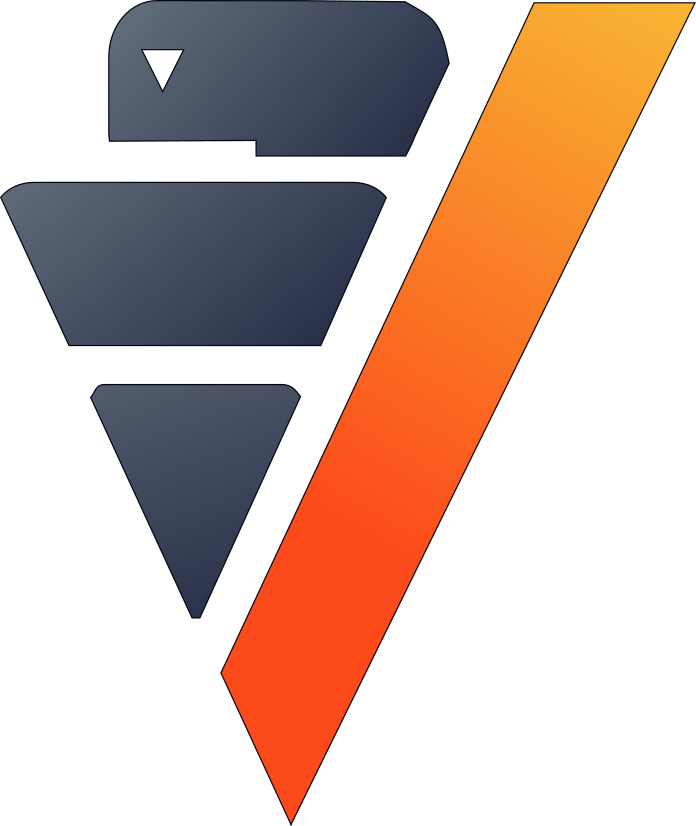

In [10]:
%%sql
/* Fetch FLIGHT_NUMBER, AIRLINE and STATE after Joining the flight_vertica table with two other tables from different databases. */
SELECT flight_vertica.FLIGHT_NUMBER, airline.AIRLINE, airports.STATE
FROM flight_vertica
INNER JOIN $$$ airline $$$ 
ON flight_vertica.AIRLINE = airline.IATA_CODE
INNER JOIN &&& airports &&&
ON flight_vertica.ORIGIN_AIRPORT = airports.IATA_CODE;

### Pandas.DataFrame

The joins also work with pandas.Dataframe. We can perform the same query that required multiple joins, but now with a local Pandas dataframe.

We will first read the <a href="passengers.csv">local CSV file</a>.

In [35]:
# Create a Pandas Data Frame after importing the csv file "passengers.csv"
import pandas as pd
passengers_pandas = pd.read_csv('passengers.csv')
passengers_pandas

FLIGHT_NUMBER  PASSENGER_COUNT
0                98              293
1              2336              222
2               840              188
3               258              143
4               135              267
...             ...              ...
5401           4106              266
5402           4113              157
5403            979              226
5404           5430              251
5405           4157              228

[5406 rows x 2 columns]

We can now perform the same query involving the three tables:
<ul class="ul_content">
    <li><b>flight_vertica</b> table (stored in <b>Vertica</b>)</li>
    <li><b>passengers_pandas</b> table (<b>pandas.DataFrame stored in-memory</b>)</li>
    <li><b>airline</b> table (stored in <b>PostgreSQL</b>)</li>
    <li><b>airports</b> table (stored in <b>MySQL</b>)</li>
</ul>

TAIL_NUMBER                   AIRLINE                 CITY   \\
1           N787AA    American Airlines Inc.             New York   \\
2           N787AA    American Airlines Inc.             New York   \\
3           N795AA    American Airlines Inc.          Los Angeles   \\
4           N795AA    American Airlines Inc.          Los Angeles   \\
5           N798AA    American Airlines Inc.             New York   \\
6           N798AA    American Airlines Inc.             New York   \\
7           N799AA    American Airlines Inc.          Los Angeles   \\
8           N799AA    American Airlines Inc.          Los Angeles   \\
9           N376AA    American Airlines Inc.    Dallas-Fort Worth   \\
10          N376AA    American Airlines Inc.    Dallas-Fort Worth   \\
11          N398AA    American Airlines Inc.              Kahului   \\
12          N398AA    American Airlines Inc.              Kahului   \\
13          N398AA    American Airlines Inc.    Dallas-Fort Worth   \\
14          N398AA    American Airlines Inc.    Dallas-Fort Worth   \\
15          N368AA    American Airlines Inc.             Honolulu   \\
16          N368AA    American Airlines Inc.             Honolulu   \\
17          N792AA    American Airlines Inc.             New York   \\
18          N792AA    American Airlines Inc.             New York   \\
19          N796AA    American Airlines Inc.          Los Angeles   \\
20          N796AA    American Airlines Inc.          Los Angeles   \\
21          N792AA    American Airlines Inc.          Los Angeles   \\
22          N792AA    American Airlines Inc.          Los Angeles   \\
23          N5ERAA    American Airlines Inc.              Kahului   \\
24          N5ERAA    American Airlines Inc.              Kahului   \\
25          N783AA    American Airlines Inc.             New York   \\
26          N783AA    American Airlines Inc.             New York   \\
27          N783AA    American Airlines Inc.        San Francisco   \\
28          N783AA    American Airlines Inc.        San Francisco   \\
29          N019AA    American Airlines Inc.              Atlanta   \\
30          N019AA    American Airlines Inc.              Atlanta   \\
31          N786AA    American Airlines Inc.             New York   \\
32          N786AA    American Airlines Inc.             New York   \\
33          N789AA    American Airlines Inc.        San Francisco   \\
34          N789AA    American Airlines Inc.        San Francisco   \\
35          N795AA    American Airlines Inc.             New York   \\
36          N795AA    American Airlines Inc.             New York   \\
37          N786AA    American Airlines Inc.          Los Angeles   \\
38          N786AA    American Airlines Inc.          Los Angeles   \\
39          N371AA    American Airlines Inc.    Dallas-Fort Worth   \\
40          N371AA    American Airlines Inc.    Dallas-Fort Worth   \\
41          N371AA    American Airlines Inc.        San Francisco   \\
42          N371AA    American Airlines Inc.        San Francisco   \\
43          N784AA    American Airlines Inc.        San Francisco   \\
44          N784AA    American Airlines Inc.        San Francisco   \\
45          N3AVAA    American Airlines Inc.               Boston   \\
46          N3AVAA    American Airlines Inc.               Boston   \\
47          N5DUAA    American Airlines Inc.    Dallas-Fort Worth   \\
48          N5DUAA    American Airlines Inc.    Dallas-Fort Worth   \\
49          N358AA    American Airlines Inc.          Los Angeles   \\
50          N358AA    American Airlines Inc.          Los Angeles   \\
51          N455AA    American Airlines Inc.              Ontario   \\
52          N455AA    American Airlines Inc.              Ontario   \\
53          N568AA    American Airlines Inc.    Dallas-Fort Worth   \\
54          N568AA    American Airlines Inc.    Dallas-Fort Worth   \\
55          N795AA    American Airlines Inc.          Los Angeles   \\
56          N795AA    American 
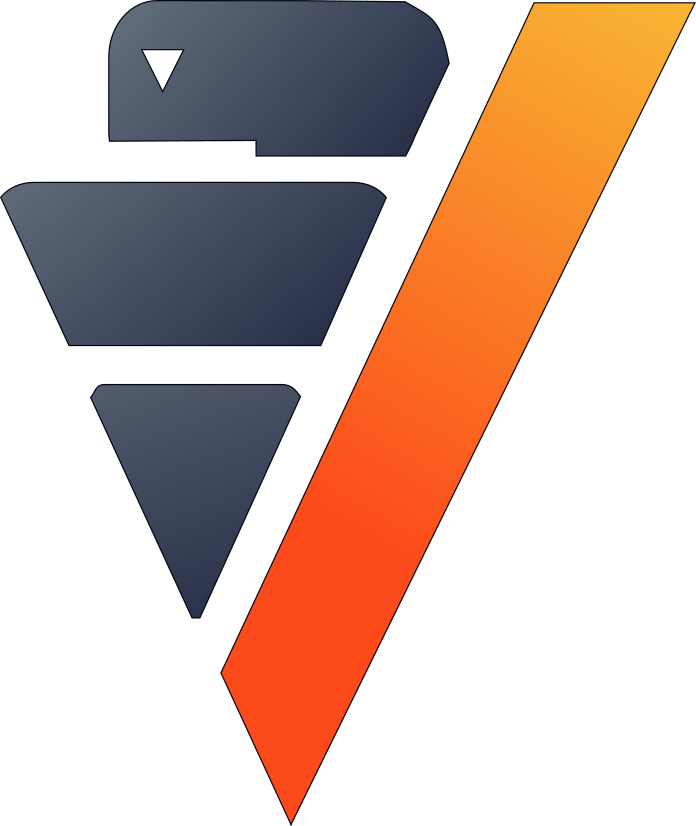

In [33]:
%%sql
SELECT 
    flight_vertica.TAIL_NUMBER, 
    airline.AIRLINE, 
    airports.CITY, 
    :passengers_pandas.PASSENGER_COUNT
FROM flight_vertica
INNER JOIN $$$ airline $$$ 
ON flight_vertica.AIRLINE = airline.IATA_CODE
INNER JOIN &&& airports &&&
ON flight_vertica.ORIGIN_AIRPORT = airports.IATA_CODE
INNER JOIN :passengers_pandas
ON flight_vertica.FLIGHT_NUMBER = :passengers_pandas.FLIGHT_NUMBER;

## Conclusion

With the combination of Verticapy and DBLINK, we can now work with multiple datasets stored in different databases. We can work simultaneously with external tables, Vertica tables, and Pandas DataFrame in a <b>single query</b>! There is no need to materialize the table before use because it's all taken care of in the background.

The cherry on the cake is the ease-of-use that is enabled by VerticaPy and its Python-like syntax. 

Queries that required paragraph upon paragraph to execute can now be done <b>efficiently</b> with only a <b>few intuitive lines of code</b>.

This new functionality opens up many possibilities for data querying and manipulation in Vertica.